In [12]:
import psycopg2
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from get_clean_data import get_data, clean_data

In [3]:
prelim_df = get_data()

In [4]:
X, y = clean_data(prelim_df, True)

In [5]:
X

,sb_tot_partcp_cnt,sb_eff_int_rate_prcnt,sb_fndng_short_ind,sb_pr_yr_fndng_prcnt
19,111,6.00,2,107.89
20,111,6.00,2,107.89
21,111,6.00,2,107.89
22,111,6.00,2,107.89
23,111,6.00,2,107.89
24,111,6.00,2,107.89
41,99,5.54,2,112.02
42,99,5.54,2,112.02
43,99,5.54,2,112.02
44,99,5.54,2,112.02


<h1>Features EDA</h1>

In [6]:
X2=X[['sb_tot_partcp_cnt','sb_eff_int_rate_prcnt','sb_fndng_short_ind','sb_pr_yr_fndng_prcnt']]

In [7]:
X2.describe()

,sb_tot_partcp_cnt,sb_eff_int_rate_prcnt,sb_fndng_short_ind,sb_pr_yr_fndng_prcnt
count,9113.000000,9113.000000,9113.000000,9113.000000
mean,1425.499506,5.696907,1.635576,113.777685
std,11663.732420,0.547806,0.481295,49.758537
min,0.000000,0.000000,1.000000,0.000000
25%,4.000000,5.680000,1.000000,94.820000
50%,16.000000,5.800000,2.000000,103.750000
75%,229.000000,5.940000,2.000000,121.800000
max,281793.000000,11.400000,2.000000,999.990000


In [8]:
X2

,sb_tot_partcp_cnt,sb_eff_int_rate_prcnt,sb_fndng_short_ind,sb_pr_yr_fndng_prcnt
19,111,6.00,2,107.89
20,111,6.00,2,107.89
21,111,6.00,2,107.89
22,111,6.00,2,107.89
23,111,6.00,2,107.89
24,111,6.00,2,107.89
41,99,5.54,2,112.02
42,99,5.54,2,112.02
43,99,5.54,2,112.02
44,99,5.54,2,112.02


In [9]:
X2[X2['sb_tot_partcp_cnt']<=100].describe()

,sb_tot_partcp_cnt,sb_eff_int_rate_prcnt,sb_fndng_short_ind,sb_pr_yr_fndng_prcnt
count,5865.000000,5865.000000,5865.000000,5865.000000
mean,14.419267,5.605480,1.630009,114.258479
std,21.499159,0.638869,0.482843,58.498407
min,0.000000,0.000000,1.000000,0.000000
25%,3.000000,5.530000,1.000000,93.290000
50%,6.000000,5.740000,2.000000,103.240000
75%,13.000000,5.890000,2.000000,121.780000
max,99.000000,11.400000,2.000000,999.990000


<h3>Distribution of Participant Count</h3>

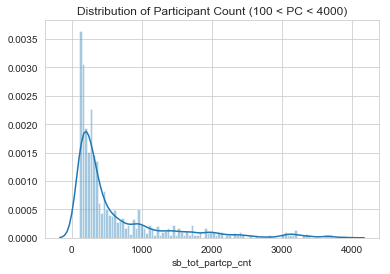

In [13]:
sns.distplot(X2[(X2['sb_tot_partcp_cnt']<4000) & (X2['sb_tot_partcp_cnt']>100)]['sb_tot_partcp_cnt'],\
            bins=100)
plt.title('Distribution of Participant Count (100 < PC < 4000)')
plt.show()

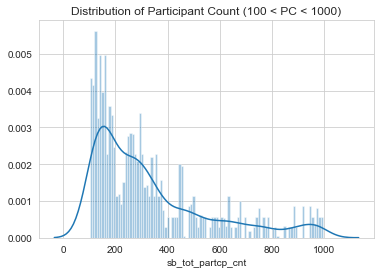

In [14]:
sns.distplot(X2[(X2['sb_tot_partcp_cnt']<1000) & (X2['sb_tot_partcp_cnt']>100)]['sb_tot_partcp_cnt'],\
            bins=100)
plt.title('Distribution of Participant Count (100 < PC < 1000)')
plt.show()

<h2>Participant Count vs. Funded Status</h2>

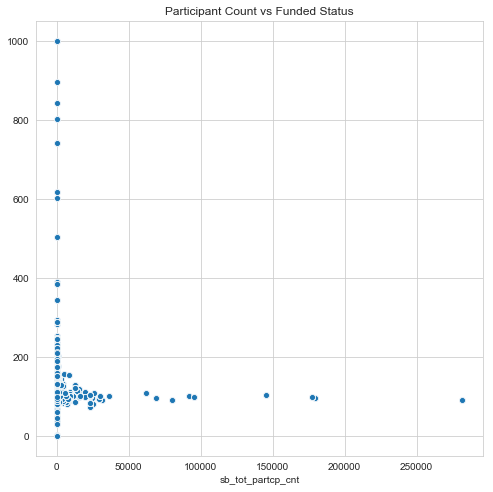

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.scatterplot(x=X2['sb_tot_partcp_cnt'], y=y)
plt.title('Participant Count vs Funded Status')
plt.show()

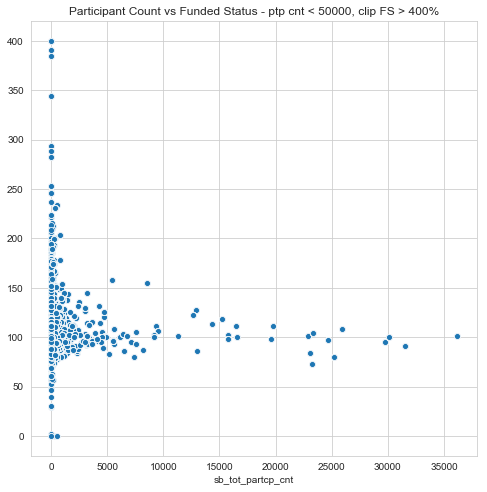

In [16]:
fig1, ax1 = plt.subplots(1,1, figsize=(8,8))
x_trnc=X2[X2['sb_tot_partcp_cnt']<50000]['sb_tot_partcp_cnt']
y_trnc=np.clip(y[X2['sb_tot_partcp_cnt']<50000],0,400)
ax1 = sns.scatterplot(x=x_trnc, y=y_trnc)
plt.title('Participant Count vs Funded Status - ptp cnt < 50000, clip FS > 400%')
plt.show()

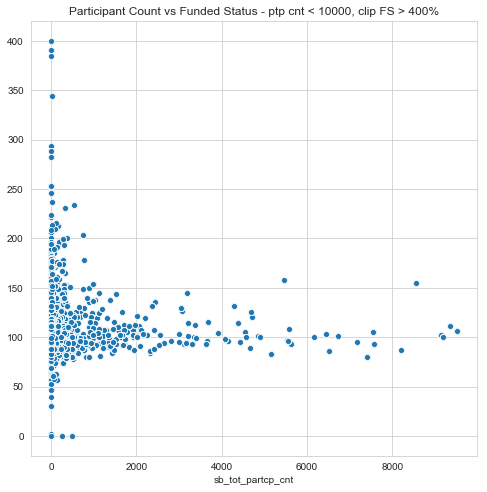

In [17]:
fig2, ax2 = plt.subplots(1,1, figsize=(8,8))
x_trnc2=X2[X2['sb_tot_partcp_cnt']<10000]['sb_tot_partcp_cnt']
y_trnc2=np.clip(y[X2['sb_tot_partcp_cnt']<10000],0,400)
ax2 = sns.scatterplot(x=x_trnc2, y=y_trnc2)
plt.title('Participant Count vs Funded Status - ptp cnt < 10000, clip FS > 400%')
plt.show()

<h2>EIR vs Funded Status</h2>

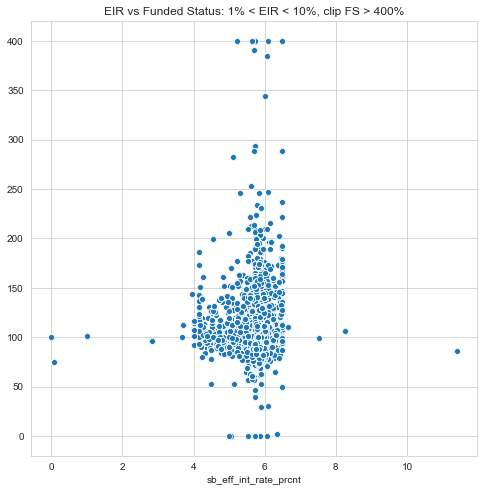

In [18]:
fig3, ax3 = plt.subplots(1,1, figsize=(8,8))
#x_trnc3=X2[(X2['sb_eff_int_rate_prcnt'] >1) & (X2['sb_eff_int_rate_prcnt'] < 10)]['sb_eff_int_rate_prcnt']
#y_trnc3=np.clip(y[(X2['sb_eff_int_rate_prcnt'] >1) & (X2['sb_eff_int_rate_prcnt'] < 10)],0,400)
x_trnc3=X2['sb_eff_int_rate_prcnt']
y_trnc3=np.clip(y,0,400)
ax3 = sns.scatterplot(x=x_trnc3, y=y_trnc3)
plt.title('EIR vs Funded Status: 1% < EIR < 10%, clip FS > 400%')
plt.show()

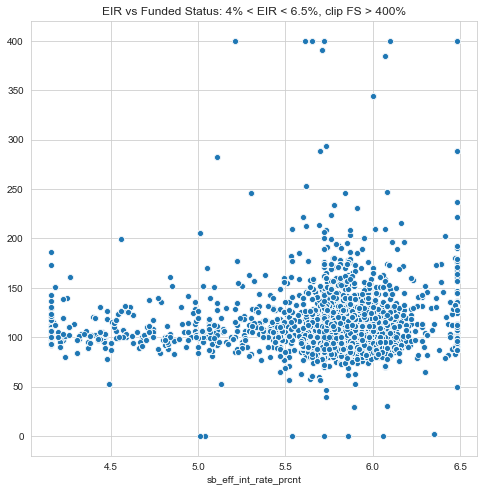

In [19]:
fig4, ax4 = plt.subplots(1,1, figsize=(8,8))
x_trnc4=X2[(X2['sb_eff_int_rate_prcnt'] >4) & (X2['sb_eff_int_rate_prcnt'] < 6.5)]['sb_eff_int_rate_prcnt']
y_trnc4=np.clip(y[(X2['sb_eff_int_rate_prcnt'] >4) & (X2['sb_eff_int_rate_prcnt'] < 6.5)],0,400)
ax4 = sns.scatterplot(x=x_trnc4, y=y_trnc4)
plt.title('EIR vs Funded Status: 4% < EIR < 6.5%, clip FS > 400%')
plt.show()

<h2>PY FS vs CY FS</h2>

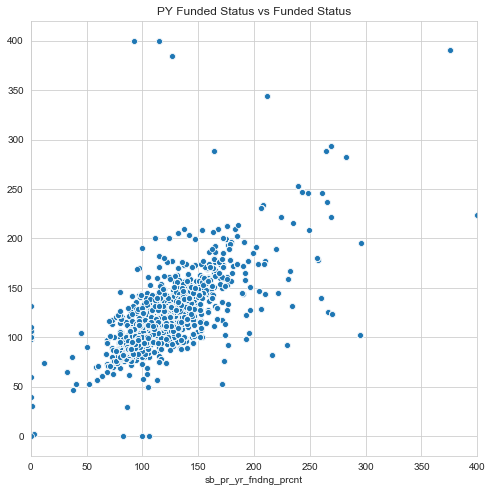

In [20]:
fig5, ax5 = plt.subplots(1,1, figsize=(8,8))
x_trnc5=X2['sb_pr_yr_fndng_prcnt']
y_trnc5=np.clip(y,0,400)
ax5 = sns.scatterplot(x=x_trnc5, y=y_trnc5)
plt.xlim(0,400)
plt.title('PY Funded Status vs Funded Status')
plt.rcParams.update({'font.size':12})
plt.show()

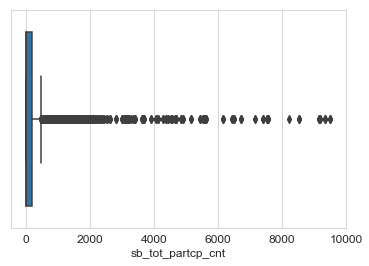

In [21]:
sns.boxplot(x=X2[X2['sb_tot_partcp_cnt']<10000]['sb_tot_partcp_cnt'])
plt.show()

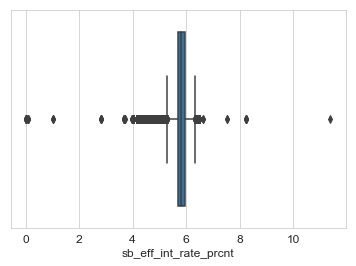

In [22]:
sns.boxplot(x=X2['sb_eff_int_rate_prcnt'])
plt.show()

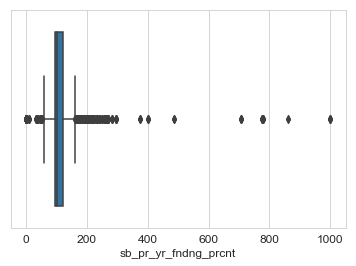

In [23]:
sns.boxplot(x=X2['sb_pr_yr_fndng_prcnt'])
plt.show()

In [ ]:
X2.head()